# Snake Environment

In [1]:
import gym
from gym.spaces import Discrete, Box
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
import cv2
import io
import base64
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

In [2]:
class snake(gym.Env):
    
    def __init__(self):
        self.action_space = Discrete(4)
        self.videos_images = []
        self.snake_max_len = 100
        self.snake_starting_length = 1
        self.snake_length = 1
        self.rows = 10
        self.columns = 10
        self.moves = [(1, 0), (0, 1), (-1, 0), (0, -1)] # 0 is down, 1 is right, 2 is up, 3 is left
        self.default_board_environment = np.zeros((self.rows, self.columns))
        self.board_state = self.default_board_environment
        self.head_location = 0
        self.apple_location = 0
        self.videos = [('/content/snake.mp4', '/content/snake.meta.json')]
    
    def render_video(self):
        lists = board.tolist()
        for n in range(len(lists)):
            lister = lists[n]
            for i in range(len(lister)):
                item = lister[i]
                done = False
                if item == 0:
                    lister[i] = [0, 0, 0]
                    done = True
                if item == 1000:
                    lister[i] = [255, 0, 0]
                    done = True
                if item == 100:
                    lister[i] = [0, 0, 244]
                if done == False:
                    lister[i] = [192, 192, 192]
            lists[n] = lister
        self.videos_images.append(lists)

    def write_video(self):
        fig, ax = plt.subplots()
        ims = []
        for i in range(len(self.videos_images)):
            im = ax.imshow(self.videos_images[i], animated=True)
            if i == 0:
                ax.imshow(self.videos_images[i])
            ims.append([im])
        ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                        repeat_delay=1000)
        ani.save('snake.mp4')
        plt.close()
        

    def step(self, action):
        done = False
        #Get Move
        move = self.moves[action]
        #Make Move
        snake_loc = self.snake_location
        reward = -0.05
        cont = True
        moving = True
        new_length = False
        if (snake_loc[0]+move[0]) >= self.rows:
            cont = False
        elif (snake_loc[0] + move[0]) < 0:
            cont = False
        if (snake_loc[1]+move[1]) >= self.columns:
            cont = False
        elif (snake_loc[1]+move[1]) < 0:
            cont = False
        if cont == True:
            new_space = self.board_state[(snake_loc[0]+move[0]), (snake_loc[1]+move[1])]
            if new_space == 1000:
                done = True
                reward = 1
                new_length = True
            if done == False:
                if new_space != 0:
                    if new_space != (self.snake_max_len - self.snake_length):
                        done = True
                        reward = -1
        else:
            moving = False
            done = True
            reward = -1
        if moving == True:
            moved_snake = False
            self.board_state[(snake_loc[0]+move[0]), (snake_loc[1]+move[1])] = self.snake_max_len
            count = self.snake_length
            while moved_snake == False:
                if (self.snake_max_len - count) <= (self.snake_max_len - self.snake_length):
                    if new_length == True:
                        find = np.where(self.board_state == (self.snake_max_len-count))
                        self.board_state[find[0], find[1]] -= 1
                    else:
                        find = np.where(self.board_state == (self.snake_max_len-count))
                        self.board_state[find[0], find[1]] = 0
                else:
                    find = np.where(self.board_state == (self.snake_max_len-count))
                    self.board_state[find[0], find[1]] -= 1
                if count == 1:
                    moved_snake = True
                count -= 1
            if self.snake_length != 1:
                self.board_state[(snake_loc[0]), (snake_loc[1])] -=1
            else:
                self.board_state[(snake_loc[0], (snake_loc[1]))] = 0
            self.snake_location = [(snake_loc[0]+move[0]), (snake_loc[1]+move[1])]
        self.render_video()
        if done == True:
            self.write_video()
        return self.board_state, reward, done
    
    def reset(self):
        rand_row = random.randint(0, (self.rows-1))
        rand_col = random.randint(0, (self.columns-1))
        #Set board space and apple
        self.board_state = self.default_board_environment
        self.board_state[rand_row, rand_col] = 1000
        self.apple_location = [rand_row, rand_col]
        #Set Snake Head location
        snake_loc = False
        while snake_loc == False:
            snake_row = random.randint(0, (self.rows-1))
            snake_col = random.randint(0, (self.columns-1))
            if self.board_state[snake_row, snake_col] != 1000:
                self.board_state[snake_row, snake_col] = self.snake_max_len
                snake_loc = True
                self.snake_location = [snake_row, snake_col]
        #Set Snake Body Location
        snake_length = 1
        snake_val = self.snake_max_len
        moves = self.moves
        snake_built = False
        last_row = snake_row
        last_col = snake_col
        if snake_length == self.snake_starting_length:
            snake_built = True
        while snake_built == False:
            viable_space = []
            for move in moves:
                viable = True
                if (last_row + move[0]) < 0:
                    viable = False
                else:
                    if (last_row + move[0]) >= self.rows:
                        viable = False
                if (last_col + move[1]) < 0:
                    viable = False
                else:
                    if (last_col + move[1]) >= self.columns:
                        viable = False
                if viable == True:
                    if self.board_state[(last_row+move[0]), (last_col+move[1])] != 0:
                        viable = False
                    if viable == True:
                        viable_space.append(move)
            if len(viable_space) == 0:
                breakpoint()
            rand_move = viable_space[random.randint(0, (len(viable_space)-1))]
            last_row = last_row + rand_move[0]
            last_col = last_col + rand_move[1]
            snake_val -= 1
            self.board_state[last_row, last_col] = snake_val
            if snake_val <= (self.snake_max_len - self.snake_starting_length):
                snake_built = True
        self.snake_length = self.snake_starting_length
        return self.board_state
    
    def render(self, mode='human', close=False):
        pass
    
    def close(self):
        pass

# **Markov Decision Making**

In [3]:
 from google.colab import drive
 import sys
 drive.mount('/content/drive')
 sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks')
 import mdp
 from mdp import MDP

Mounted at /content/drive


In [4]:
def markov_decision_process(apple_coordinates, snake_coordinates):
    rows = 10
    cols = 10

    apple_reward = 1

    moves = [(1, 0), (0, 1), (-1, 0), (0, -1)]

    transition_probs = {}
    rewards = {}

    r = apple_coordinates[0]
    c = apple_coordinates[1]
    
    _snake_ = (snake_coordinates[0], snake_coordinates[1])

    for _r_ in range(rows):
        for _c_ in range(cols):
            transition_probs[f'(({r}, {c}), ({_r_}, {_c_}))'] = {}
            _move_ = []
            i = 0
            for move in moves:
                new_r = _r_ + move[0]
                new_c = _c_ + move[1]
                cont = True

                if new_r < 0:
                    cont = False
                elif new_r >= cols:
                    cont = False
                
                if new_c < 0:
                    cont = False
                elif new_c >= cols:
                    cont = False
                
                if cont == True:
                    _move_.append((i, (new_r, new_c)))
                i += 1
            
            for move in _move_:
                transition_probs[f'(({r}, {c}), ({_r_}, {_c_}))'][f'{move[0]}'] = {}
                transition_probs[f'(({r}, {c}), ({_r_}, {_c_}))'][f'{move[0]}'][f'(({r}, {c}), {move[1]})'] = 1
    
    #Set Rewards
    i = 0
    _move_ = []
    for move in moves:
        new_r = r - move[0]
        new_c = c - move[1]

        cont = True
        if new_r < 0:
            cont = False
        elif new_r >= cols:
            cont = False
        
        if new_c < 0:
            cont = False
        elif new_c >= cols:
            cont = False
        
        if cont == True:
            _move_.append((i, (new_r, new_c)))
        i += 1
    
    for move in _move_:
        rewards[f'(({r}, {c}), ({move[1][0]}, {move[1][1]}))'] = {}
        rewards[f'(({r}, {c}), ({move[1][0]}, {move[1][1]}))'][f'{move[0]}'] = {f'(({r}, {c}), ({r}, {c}))':apple_reward}

    init_state = f'(({r}, {c}), {_snake_})'
    
    mdp = MDP(transition_probs, rewards, initial_state=init_state)
    
    return mdp

In [5]:
def get_action_value(mdp, state_values, state, action, gamma):

  q = 0
  for _s_ in mdp.get_all_states():
      q += mdp.get_transition_prob(state, action, _s_)*(mdp.get_reward(state, action, _s_) + gamma*state_values[_s_])
  return q

In [6]:
def get_new_state_value(mdp, state_values, state, gamma):
    if mdp.is_terminal(state):
        return 0
    
    A = [a for a in mdp.get_possible_actions(state)]
    v = np.zeros(len(mdp.get_possible_actions(state)))
    i = 0

    for a in mdp.get_possible_actions(state):
        v[i] = get_action_value(mdp, state_values, state, a, gamma)
        A[i] = a
        i += 1
    
    V = {A[np.argmax(v)]:v[np.argmax(v)]}

    return V

In [7]:
def get_optimal_action(mdp, state_values, state, gamma):
  if mdp.is_terminal(state):
      return None
  
  nsv = get_new_state_value(mdp, state_values, state, gamma)
  a = list(nsv)[0]

  return a

In [8]:
def get_coordinates(board):
    apple = (int(np.argmax(board)/10), np.argmax(board)%10)
    snake = np.where(board==100)
    snake = (snake[0][0], snake[1][0])
    return apple, snake

# **Implementation**

In [9]:
env = snake()
board = env.reset()

apple_coordinates, snake_coordinates = get_coordinates(board)

print( 'Coordinates at:', apple_coordinates, snake_coordinates)

mdp = markov_decision_process(apple_coordinates, snake_coordinates)

Coordinates at: (1, 8) (0, 1)


In [10]:
gamma = 0.9
iter = 100
min_difference = 0.001

state_values = {s:0 for s in mdp.get_all_states()}

for i in range(iter):
    new_state_vals = {}
    for _s_ in mdp.get_all_states():
        nsv = get_new_state_value(mdp, state_values, _s_, gamma)
        a = list(nsv)[0]
        v = nsv[a]
        new_state_vals[_s_] = v
    
    diff = max(abs(new_state_vals[_s_] - state_values[_s_]) for _s_ in mdp.get_all_states())
    state_values = new_state_vals

    print(f'iter {i} diff: {diff}')

    if diff < min_difference:
        print('Min Difference')
        break

iter 0 diff: 1.0
iter 1 diff: 0.9
iter 2 diff: 0.81
iter 3 diff: 0.7290000000000001
iter 4 diff: 0.6561000000000001
iter 5 diff: 0.5904900000000002
iter 6 diff: 0.5314410000000002
iter 7 diff: 0.47829690000000014
iter 8 diff: 0.4304672100000002
iter 9 diff: 0.38742048900000037
iter 10 diff: 0.3486784401000005
iter 11 diff: 0.3138105960900004
iter 12 diff: 0.28242953648100055
iter 13 diff: 0.2541865828329004
iter 14 diff: 0.2287679245496106
iter 15 diff: 0.20589113209464938
iter 16 diff: 0.1853020188851845
iter 17 diff: 0.1667718169966661
iter 18 diff: 0.1500946352969995
iter 19 diff: 0.13508517176729962
iter 20 diff: 0.12157665459056965
iter 21 diff: 0.10941898913151271
iter 22 diff: 0.0984770902183616
iter 23 diff: 0.08862938119652597
iter 24 diff: 0.0797664430768732
iter 25 diff: 0.07178979876918579
iter 26 diff: 0.06461081889226716
iter 27 diff: 0.0581497370030406
iter 28 diff: 0.052334763302736675
iter 29 diff: 0.047101286972462963
iter 30 diff: 0.04239115827521678
iter 31 diff: 0.

In [11]:
apple_coordinates, snake_coordinates = get_coordinates(board)
print(apple_coordinates, snake_coordinates)
print(f'({apple_coordinates}, {snake_coordinates})')

(1, 8) (0, 1)
((1, 8), (0, 1))


In [13]:
for _ in range(100):
    apple_coordinates, snake_coordinates = get_coordinates(board)
    policy = get_optimal_action(mdp, state_values, f'({apple_coordinates}, {snake_coordinates})', gamma)
    #policy = int(input()) # 0 is down, 1 is right, 2 is up, 3 is left3
    board, reward, done = env.step(int(policy))
    if done == True:
        print(f'Game Finished reward: {reward}')
        break
    if _ > 100:
        print('Time Exceeded')
        break

for f in env.videos:
    video = io.open(f[0], 'r+b').read()
    encoded = base64.b64encode(video)

    display.display(display.HTML(data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))))

Game Finished reward: 1


In [14]:
from mdp import has_graphviz
from IPython.display import display
print("Graphviz available:", has_graphviz)

Graphviz available: True


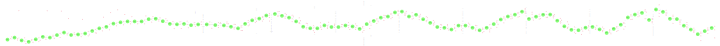

In [15]:
if has_graphviz:
    from mdp import plot_graph
    display(plot_graph(mdp))


In [17]:

r = []
gamma = 0.9

for _ in range(1000):
    state, reward, done, _ = mdp.step(get_optimal_action(mdp, state_values, state, gamma))
    r.append(reward)


In [18]:
print(f'Average Rewards: {np.array(r).mean()}')

Average Rewards: 0.5
